# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [2]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [3]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

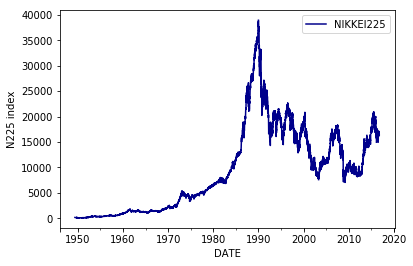

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

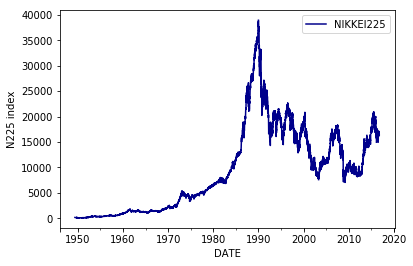

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')
plt.show()

plt.show()を追加することにより出力の仕方が変わりました。

In [7]:
price = web.DataReader("aapl", 'yahoo',"1990/1/4",end)#yahooのサービスの停止により変更
price.head(1)

,,Close,High,Low,Open,Volume
Symbol,Date,,,,,
aapl,1990-01-04,1.3438,1.3839,1.3304,1.3438,55378400


In [8]:
print(price.tail(1))

                    Close    High    Low    Open    Volume
Symbol Date                                               
aapl   2016-09-30  113.05  113.37  111.8  112.46  36379106


## 4.2 データベースの加工

In [9]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

ValueError: cannot include dtype 'M' in a buffer

KeyError: '2015'

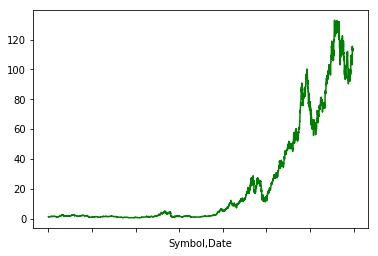

In [10]:
price = web.DataReader("aapl", 'morningstar','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [ ]:
print(price.resample('M').first().tail())

In [ ]:
print(price.resample('M').last().tail())

In [ ]:
print(price.resample('M',loffset='1d').last().tail())

In [ ]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [ ]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

In [ ]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

In [ ]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')